## Accuracy

In [1]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) returns nothing. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) using Sex feature 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null prepocessing
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# drop unneccesary features
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# label encoding
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# put above functions together
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train_test_split on data
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# using dummy classifier to fit and predict
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier accuracy: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier accuracy: 0.7877


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # return 0 for all
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# get digits data from sklearn library
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [5]:
sum(digits.target == 7)

179

In [6]:
# True if digits = 7, and convert to 1. 0 if false
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [7]:
pd.Series(y_test)

0      0
1      0
2      0
3      0
4      0
      ..
445    0
446    0
447    0
448    0
449    0
Length: 450, dtype: int32

In [8]:
# label distribution unbalanced 
print('test set size :', y_test.shape)
print('test set distribution')
print(pd.Series(y_test).value_counts())

# Dummy Classifier
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('accuracy if all predict 0:{:.3f}'.format(accuracy_score(y_test , fakepred)))

test set size : (450,)
test set distribution
0    405
1     45
dtype: int64
accuracy if all predict 0:0.900


## Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

# get confusion matrix on previous classifier
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## Precision Recall

**Precision and Recall on MyFakeClassifier**

In [10]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("Precision:", precision_score(y_test, fakepred))
print("Recall:", recall_score(y_test, fakepred))

Precision: 0.0
Recall: 0.0


C:\Users\DooDoo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**function to return confusion matrix**

In [11]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('confusion matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

confusion matrix
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869


C:\Users\DooDoo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Precision/Recall Trade-off

**predict_proba( )**

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba() Shape : {0}'.format(pred_proba.shape))
print('pred_proba array sample on first 3 data\n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('use higher probability to predict the class \n',pred_proba_result[:3])


pred_proba() Shape : (179, 2)
pred_proba array sample on first 3 data
: [[0.46198241 0.53801759]
 [0.87863883 0.12136117]
 [0.87716256 0.12283744]]
use higher probability to predict the class 
 [[0.46198241 0.53801759 1.        ]
 [0.87863883 0.12136117 0.        ]
 [0.87716256 0.12283744 0.        ]]


**Binarizer**

In [14]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# 0 if smaller than threshold value, 1 if bigger
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


**Threshold value of 0.5 on Binarizer**

In [15]:
from sklearn.preprocessing import Binarizer

#Binarizer's threshold value  
custom_threshold = 0.5

# use second column from predict_proba( )
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869


**Threshold value = 0.4**

In [16]:
# smaller Binarizer's threshold value to 0.4 
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

confusion matrix
[[98 20]
 [10 51]]
Accuracy: 0.8324, Precision: 0.7183, Recall: 0.8361


**Use multiple threshold value on Binarizer**

In [17]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # iter through thresholds list
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('threshold value:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

threshold value: 0.4
confusion matrix
[[98 20]
 [10 51]]
Accuracy: 0.8324, Precision: 0.7183, Recall: 0.8361
threshold value: 0.45
confusion matrix
[[103  15]
 [ 12  49]]
Accuracy: 0.8492, Precision: 0.7656, Recall: 0.8033
threshold value: 0.5
confusion matrix
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869
threshold value: 0.55
confusion matrix
[[109   9]
 [ 15  46]]
Accuracy: 0.8659, Precision: 0.8364, Recall: 0.7541
threshold value: 0.6
confusion matrix
[[112   6]
 [ 16  45]]
Accuracy: 0.8771, Precision: 0.8824, Recall: 0.7377


**precision_recall_curve( ) to get precision and recall for each threshold value**

In [18]:
from sklearn.metrics import precision_recall_curve

# get predicted probabilities
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('threshold value array Shape:', thresholds.shape)
print('precision array Shape:', precisions.shape)
print('recall array Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])
 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('10 indexes for sampling:', thr_index)
print('threshold values to 10 samples: ', np.round(thresholds[thr_index], 2))

print('precision on sampled thresholds: ', np.round(precisions[thr_index], 3))
print('recall on sampled thresholds: ', np.round(recalls[thr_index], 3))

threshold value array Shape: (143,)
precision array Shape: (144,)
recall array Shape: (144,)
thresholds 5 sample: [0.10394004 0.10394229 0.10396763 0.10779381 0.10891779]
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
10 indexes for sampling: [  0  15  30  45  60  75  90 105 120 135]
threshold values to 10 samples:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
precision on sampled thresholds:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
recall on sampled thresholds:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [19]:
print(thresholds[140:])
print(precisions[140:])
print(recalls[140:])

[0.95039958 0.95189451 0.96510067]
[1. 1. 1. 1.]
[0.06557377 0.04918033 0.03278689 0.        ]


**get precision recall curve**

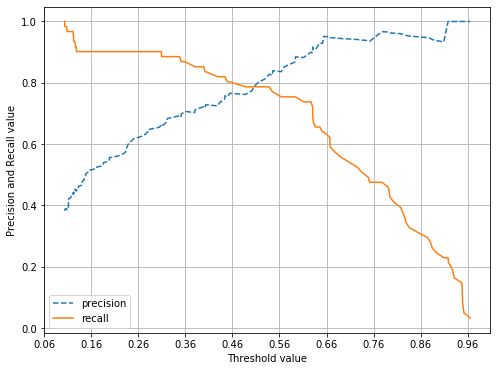

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray and precision & recall ndarray. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X axis with threshold values, Y axis on precision and recall
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # Scale X axis
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x axis, y axis label, legend, and grid setting
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


### F1 Score

In [21]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 Score: {0:.4f}'.format(f1))


F1 Score: 0.7805


In [22]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # Add F1 score
    f1 = f1_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    # add f1 score print
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


threshold value: 0.4
confusion matrix
[[98 20]
 [10 51]]
accuracy: 0.8324, precision: 0.7183, recall: 0.8361, F1:0.7727
threshold value: 0.45
confusion matrix
[[103  15]
 [ 12  49]]
accuracy: 0.8492, precision: 0.7656, recall: 0.8033, F1:0.7840
threshold value: 0.5
confusion matrix
[[104  14]
 [ 13  48]]
accuracy: 0.8492, precision: 0.7742, recall: 0.7869, F1:0.7805
threshold value: 0.55
confusion matrix
[[109   9]
 [ 15  46]]
accuracy: 0.8659, precision: 0.8364, recall: 0.7541, F1:0.7931
threshold value: 0.6
confusion matrix
[[112   6]
 [ 16  45]]
accuracy: 0.8771, precision: 0.8824, recall: 0.7377, F1:0.8036


## ROC Curve and AUC

In [23]:
from sklearn.metrics import roc_curve

# get predicted probabilities 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# get 10 samples with 5 steps
thr_index = np.arange(0, thresholds.shape[0], 5)
print('index for 10 samples of thresholds:', thr_index)
print('values of 10 samples: ', np.round(thresholds[thr_index], 2))

print('Sample FPR: ', np.round(fprs[thr_index], 3))
print('Sample TPR: ', np.round(tprs[thr_index], 3))


index for 10 samples of thresholds: [ 0  5 10 15 20 25 30 35 40 45 50]
values of 10 samples:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
Sample FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
Sample TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


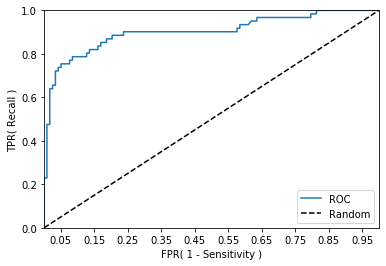

In [24]:
def roc_curve_plot(y_test , pred_proba_c1):
    # Get FPR, TPR
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # plot ROC Curve
    plt.plot(fprs , tprs, label='ROC')
    # diagonal line on the plot 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # plot settings  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


In [25]:
from sklearn.metrics import roc_auc_score

#pred = lr_clf.predict(X_test)
#roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC value: {0:.4f}'.format(roc_score))


ROC AUC value: 0.9024


In [26]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # add ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion matrix')
    print(confusion)
    # ROC-AUC print
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [25]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)